# Part I. Procuring Datasets for Last 12 Months
***
Importing dependencies and setting basic URL variables. URL will look like: 
<br/> 
*`http://data.insideairbnb.com/united-states/il/chicago/2019-07-15/visualisations/listings.csv`*

In [1]:
import os
import glob
import wget
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
from urllib.request import urlopen, URLError
from pprint import pprint

base = 'http://data.insideairbnb.com/united-states/il/chicago/'
v = '/visualisations'
        
l = '/listings.csv'
r = '/reviews.csv'

base+'2019-'+'07-'+'15'+v+l

'http://data.insideairbnb.com/united-states/il/chicago/2019-07-15/visualisations/listings.csv'

Create year, month, and day lists to be used as a lookup. 
<br/> 
Convert integers into padded string variables.

In [21]:
yr = [str(x) + '-' for x in list(range(2018,2020))]

mo = [format(x, '02d') + '-' for x in list(range(1,13))]

dy = [format(x, '02d') for x in list(range(1,32))]

print(f'Year:\n{yr}\n\nMonth:\n{mo}\n\nDay:\n{dy}')

Year:
['2018-', '2019-']

Month:
['01-', '02-', '03-', '04-', '05-', '06-', '07-', '08-', '09-', '10-', '11-', '12-']

Day:
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


In [3]:
temp = yr[0]+mo[0]+dy[0]
temp

'2018-01-01'

In [19]:
# ymd_full = []

# for day in dy: 
#     for month in mo:
#         for year in yr:
#             ymd_full.append(year+month+day)

ymd_full = [(year+month+day) for day in dy for month in mo for year in yr]

ymd_full[:10]

['2018-01-01',
 '2019-01-01',
 '2018-02-01',
 '2019-02-01',
 '2018-03-01',
 '2019-03-01',
 '2018-04-01',
 '2019-04-01',
 '2018-05-01',
 '2019-05-01']

Creating a function to generate a gross list of links
***

In [22]:
def download_list_csv(): 
    type = input('type of review? ')
    temp = []
    for date in ymd_full: 
        if type.startswith('li'): 
            temp.append(base+date+v+l)
        elif type.startswith('re'): 
            temp.append(base+date+v+r)
        else: 
            return ("go home, you're drunk")
    return temp

listings_list = download_list_csv()
pprint(listings_list[:10])
print('\n')
reviews_list = download_list_csv()
pprint(reviews_list[:10])
print('\n')
temp = download_list_csv()
pprint(temp)

type of review? listing
['http://data.insideairbnb.com/united-states/il/chicago/2018-01-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-01-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2018-02-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-02-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2018-03-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-03-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2018-04-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-04-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2018-05-01/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-05-01/visualisations/listings.csv']


type

Using the `urllib` library to validate the URLs in our newly generated lists
***

In [25]:
def validate_url(url):
    try:
        urlopen(url)
        return True
    except URLError:
        return False

print(validate_url("http://data.insideairbnb.com/united-states/il/chicago/8888888888888888/visualisations/reviews.csv"))
validate_url("http://data.insideairbnb.com/united-states/il/chicago/2019-07-15/visualisations/reviews.csv")

False


True

Creating a loop utilizing the newly created `validate_url` function
***

In [26]:
def download_query(): 
    
    dl_list = download_list_csv()
    
    invalid = []
    valid = []
    counter = 0

    print(f'{"%"*6} Ready. Set. Go. {"%"*6}\n{"-"*29}')

    for link in dl_list:
        if validate_url(link) == False: 
            invalid.append(link)
        else: 
            valid.append(link)
            counter += 1
            print(f'{counter}. {link}\n{"-"*29}')
    print(f'{"%"*5} Ready. Set. Stop. {"%"*5}')
    return valid
          
temp = download_query()

type of review? listing
%%%%%% Ready. Set. Go. %%%%%%
-----------------------------
1. http://data.insideairbnb.com/united-states/il/chicago/2019-02-09/visualisations/listings.csv
-----------------------------
2. http://data.insideairbnb.com/united-states/il/chicago/2018-10-11/visualisations/listings.csv
-----------------------------
3. http://data.insideairbnb.com/united-states/il/chicago/2018-02-12/visualisations/listings.csv
-----------------------------
4. http://data.insideairbnb.com/united-states/il/chicago/2019-03-12/visualisations/listings.csv
-----------------------------
5. http://data.insideairbnb.com/united-states/il/chicago/2018-12-13/visualisations/listings.csv
-----------------------------
6. http://data.insideairbnb.com/united-states/il/chicago/2019-06-14/visualisations/listings.csv
-----------------------------
7. http://data.insideairbnb.com/united-states/il/chicago/2018-09-14/visualisations/listings.csv
-----------------------------
8. http://data.insideairbnb.com/un

In [34]:
ymd_recent = []

for x in temp:
    x = x.replace("http://data.insideairbnb.com/united-states/il/chicago/", "")
    x = x.replace("/visualisations/listings.csv", "")
    ymd_recent.append(x)

ymd_recent.sort(key=lambda date: datetime.strptime(date, '%Y-%m-%d'),reverse=True)
ymd_recent = ymd_recent[:12]

ymd_recent

['2019-08-19',
 '2019-07-15',
 '2019-06-14',
 '2019-05-19',
 '2019-04-15',
 '2019-03-12',
 '2019-02-09',
 '2019-01-17',
 '2018-12-13',
 '2018-11-15',
 '2018-10-11',
 '2018-09-14']

In [55]:
def download_list_csv(): 
    type = input('type of review? ')
    temp = []
    for date in ymd_recent: 
        if type.startswith('li'): 
            temp.append(base+date+v+l)
        elif type.startswith('re'): 
            temp.append(base+date+v+r)
        else: 
            return ("go home, you're drunk")
    return temp

listings_list = download_list_csv()
pprint(listings_list)

type of review? listing
['http://data.insideairbnb.com/united-states/il/chicago/2019-08-19/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-07-15/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-06-14/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-05-19/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-04-15/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-03-12/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-02-09/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2019-01-17/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2018-12-13/visualisations/listings.csv',
 'http://data.insideairbnb.com/united-states/il/chicago/2018-11-15/visualisations/listings.csv',
 'http

In [40]:
ymd_col = []
for x in ymd_recent: 
    x = datetime.strptime(x, '%Y-%m-%d')
    x = x.strftime('%m. %b')
    ymd_col.append(x)
    
ymd_col

['08. Aug',
 '07. Jul',
 '06. Jun',
 '05. May',
 '04. Apr',
 '03. Mar',
 '02. Feb',
 '01. Jan',
 '12. Dec',
 '11. Nov',
 '10. Oct',
 '09. Sep']

In [59]:
# decided not to use inside jupyter

# def bar_custom(current, total, width = 80):
#     print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

In [58]:
temp = ['http://data.insideairbnb.com/united-states/il/chicago/2019-02-09/visualisations/listings.csv']

def download_csv():
    counter = 0

    for link in temp:
        
        x = 'static/data/listings'+str(counter)+'.csv'
        wget.download(link, out = "data")
        os.rename('static/data/listings.csv', x)
        counter += 1
        
download_csv()

100% [..........................................................................] 1238522 / 1238522

In [63]:
temp = ['http://data.insideairbnb.com/united-states/il/chicago/2019-02-09/visualisations/listings.csv']

def download_csv():
    counter = 0

    for link in temp:
        
        x = 'static/data/listings'+str(counter)+'.csv'
        wget.download(link, out = "data")
        os.rename('static/data/listings.csv', x)
        
        month_append = pd.read_csv('static/data/listings'+str(counter)+'.csv')
        month_append['month_test'] = ymd_col[counter]
        month_append.to_csv('static/data/listings'+str(counter)+'.csv')
        counter += 1
        
download_csv()

temp = pd.read_csv('static/data/listings0.csv')
temp.head()

100% [..........................................................................] 1238522 / 1238522

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_test
0,0,2384,Large Private Room in Hyde Park - Walk to UChi...,2613,Rebecca,NaN,Hyde Park,41.788865,-87.586709,Private room,50,2,139,2018-12-03,2.79,1,235,08. Aug
1,1,4505,We're back. 365 Great Reviews. 1 bad one.,5775,Craig & Kathleen,NaN,South Lawndale,41.854953,-87.696962,Entire home/apt,117,2,366,2018-11-24,3.03,1,0,08. Aug
2,2,6715,Lincoln Park Oasis - Unit 2 ONLY,15365,Reem,NaN,Lincoln Park,41.929262,-87.660091,Entire home/apt,255,4,93,2018-08-12,0.79,2,310,08. Aug
3,3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.902895,-87.681822,Entire home/apt,80,2,327,2019-02-04,2.80,1,351,08. Aug
4,4,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.917689,-87.637879,Entire home/apt,150,3,33,2018-10-14,0.56,12,325,08. Aug


Combining everything into one function
***

In [67]:
def download_csv():
    csv_list = download_list_csv()
    
    counter = 0
    print(f'\n{"="*6} Download start. {"="*6}\n{"~"*29}')
    for link in csv_list:
        if csv_list[0].endswith('listings.csv'): 
            csv_name = 'static/data/listings'+str(counter)+'.csv'
            wget.download(link, out = "data")
            os.rename('static/data/listings.csv', csv_name)
            month_append = pd.read_csv('static/data/listings'+str(counter)+'.csv')
            month_append['month_test'] = ymd_col[counter]
            month_append.to_csv('static/data/listings'+str(counter)+'.csv')
            counter += 1
        else: 
            csv_name = 'static/data/reviews'+str(counter)+'.csv'
            wget.download(link, out = "data")
            os.rename('static/data/reviews.csv', csv_name)
            month_append = pd.read_csv('static/data/reviews'+str(counter)+'.csv')
            month_append['month_test'] = ymd_col[counter]
            month_append.to_csv('static/data/reviews'+str(counter)+'.csv')
            counter += 1

    print(f'\n{"~"*29}\n{"="*5} Download complete {"="*5}')
    
temp = download_csv()

type of review? review

====== Download start. ======
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
100% [..........................................................................] 5028922 / 5028922
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
===== Download complete =====


# Part II. Merging Datasets
***

In [85]:
listings_df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('static/data', "listings*.csv"))))

listings_df = listings_df.drop(['Unnamed: 0', 'neighbourhood_group', 'last_review'], axis = 1) 
listings_df = listings_df.fillna(0)

print(f'length is: {len(listings_df)}')
listings_df.head()

length is: 95947


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month_test
0,2384,Hyde Pk-Walk to UChicago/10 min train to McCor...,2613,Rebecca,Hyde Park,41.78886,-87.58671,Private room,55,2,167,2.98,1,320,08. Aug
1,4505,One Great Apartment. 377 Great Reviews. 1 Bad ...,5775,Craig & Kathleen,South Lawndale,41.85495,-87.69696,Entire home/apt,117,2,378,2.97,1,332,08. Aug
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90289,-87.68182,Entire home/apt,80,2,355,2.88,1,331,08. Aug
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,40,0.61,10,335,08. Aug
4,10610,3 Comforts of Cooperative Living,2140,Lois,Hyde Park,41.79708,-87.59195,Private room,35,2,39,0.66,4,261,08. Aug


In [86]:
reviews_df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('static/data', "reviews*.csv"))))

reviews_df = reviews_df.drop(['Unnamed: 0'], axis = 1) 

print(f'length is: {len(reviews_df)}')
reviews_df.head()

length is: 3492352


,listing_id,date,month_test
0,2384,2015-01-09,08. Aug
1,2384,2015-03-24,08. Aug
2,2384,2015-04-19,08. Aug
3,2384,2015-04-30,08. Aug
4,2384,2015-05-04,08. Aug


In [87]:
listings_df = listings_df.replace(r'\n',' ', regex=True) 
listings_df = listings_df.replace(r"'L'",'L', regex=True) 

# Part III. Zip Codes, Bins, and Exporting
***

In [79]:
gkey = ''

In [44]:
temp = listings_df[['id', 'latitude', 'longitude']]
print(f"Gross Length: {len(temp)}")

temp = temp.drop_duplicates(subset=['latitude', 'longitude'], keep='first')
print(f"Net Length: {len(temp)}")

temp.head()

Gross Length: 152240
Net Length: 25614


,id,latitude,longitude
0,2384,41.788865,-87.586709
1,4505,41.854953,-87.696962
2,6715,41.929262,-87.660091
3,7126,41.902895,-87.681822
4,9811,41.917689,-87.637879


In [45]:
lat = temp['latitude']
long = temp['longitude']

temp['concat'] = temp['latitude'].map(str) + '%2C' + temp['longitude'].map(str)
temp.head()

,id,latitude,longitude,concat
0,2384,41.788865,-87.586709,41.788864900877655%2C-87.58670890962763
1,4505,41.854953,-87.696962,41.85495262496367%2C-87.69696178980682
2,6715,41.929262,-87.660091,41.92926222112926%2C-87.66009125412157
3,7126,41.902895,-87.681822,41.9028949379226%2C-87.68182159890866
4,9811,41.917689,-87.637879,41.91768923612023%2C-87.63787943696494


In [51]:
temp_list = []

for x in temp['concat'][:1]: 
    
    base_url = (f'https://maps.google.com/maps/api/geocode/json?latlng={x}&key={gkey}')
    temp_list.append(base_url)


for item in temp_list:
    
    response = requests.get(item)
    geo_data = response.json()
    temp = geo_data["results"][0]['address_components'][7]['long_name']
    print(temp)

60637


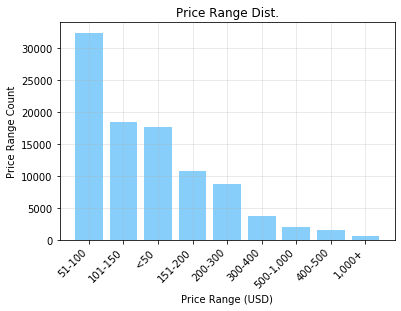

In [88]:
import matplotlib.pyplot as plt

price_bins = [-1,
              50,
              100,
              150,
              200,
              300,
              400,
              500,
              1000,
              10000
             ]

price_ranges = ['<50 ',
                '51-100',
                '101-150',
                '151-200',
                '200-300',
                '300-400',
                '400-500',
                '500-1,000',
                '1,000+'
               ]

temp = listings_df[['price']]
listings_df['price_range'] = pd.cut(temp['price'], price_bins, labels = price_ranges)

temp = listings_df['price_range'].value_counts()

temp = pd.DataFrame({'Labels' : temp.index,
                     'Values' : temp.values 
                    })

plt.bar(temp['Labels'], temp['Values'], color='lightskyblue', align="center")
plt.title("Price Range Dist.")
plt.xlabel("Price Range (USD)")
plt.ylabel("Price Range Count")
plt.xticks(rotation=45, ha = "right")
plt.grid(alpha = 0.33)

plt.show()

In [89]:
listings_df[['id', 'price', 'price_range']].head()

,id,price,price_range
0,2384,55,51-100
1,4505,117,101-150
2,7126,80,51-100
3,9811,150,101-150
4,10610,35,<50


In [90]:
listings_df = listings_df.set_index('id')
reviews_df = reviews_df.set_index('listing_id')

listings_df.to_csv('static/data/df_listings.csv')
reviews_df.to_csv('static/data/df_reviews.csv')

SQLite - Setting up Tables:
<br/> 
<img align="left" src="static/data/SQL_Setup.PNG">